# Project Overview
- In this project, I will analyze the TMDb movie dataset by using Python libraries NumPy, pandas, and Matplotlib, The dataset was wrangled and cleaned The dataset contains information and metrics that measure how successful these movies are. These metrics include popularity, revenue and vote average.

- My project investigation focus on finding properties are associated with successful movies. 

- The project primary goal is to go through the general data analysis process, so the project report is including four parts:

- questions
- gather
- data wrangling
- observations (Qulatiy, Tidiness)
- define exploratory data analysis
- clean
- test
- visualize
 

# Questions
- what makes a movie popular
- what make a movie top rated
- what types of movies does people like the most
- global events effect on production and movie count
- actor vs movie popluarity

In [40]:
#loading liberaries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


# Gather

In [41]:
#create a working copy
df = pd.read_csv( 'tmdb-movies.csv' )
df_c = df.copy()


# Assess

## Functions

In [42]:
def get_review(df):
    '''
    A function to show all descriptions of a data set, it can be used any time at the project to check data after any modifications
    '''
    display(df.shape)
    display(df.info())
    df.hist(figsize = (12,10))
    display(df.sample(10))
    display(pd.DataFrame(df.dtypes))
    display(df.describe())

(10866, 21)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

None

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
5873,229839,tt2805748,0.205676,0,0,Grave Halloween,Cassi Thomson|Dejan Loyola|Graham Wardle|Jesse...,NaN,Steven R. Monroe,A deadly venture into the Suicide Forest.,suicide|college|evil spirit|forest|tokyo japan,An American college student studying in Japan ...,90,Horror,Syfy,10/12/13,13,3.8,2013,0.000000e+00,0.000000e+00
100,326359,tt4007502,1.724712,0,0,Frozen Fever,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,NaN,Chris Buck|Jennifer Lee,NaN,sister sister relationship|birthday|song|birth...,"On Anna's birthday, Elsa and Kristoff are dete...",8,Adventure|Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...,3/9/15,475,7.0,2015,0.000000e+00,0.000000e+00
1915,60366,tt1129441,0.019105,3500,0,ThanksKilling,Lance Predmore|Ryan E. Francis|Lindsey Anderse...,NaN,Jordan Downey,"Gobble, Gobble, Motherfucker!",slasher|bestiality|raped by animal|evil puppet...,A homicidal turkey axes off college kids durin...,66,Comedy|Horror|Thriller,NaN,11/17/09,10,4.1,2009,3.557402e+03,0.000000e+00
7276,24559,tt0069280,0.432033,3200000,0,Slaughterhouse-Five,Michael Sacks|Ron Leibman|Eugene Roche|Sharon ...,NaN,George Roy Hill,Billy Pilgrim lives - from time to time.,future|dresden|pilgrim|alien|optometrist,"""Listen: Billie Pilgrim has come unstuck in ti...",104,Comedy|Drama|Fantasy|Science Fiction,Vanadas Productions,3/15/72,17,6.0,1972,1.668659e+07,0.000000e+00
6236,25,tt0418763,1.148377,72000000,96889998,Jarhead,Jamie Foxx|Jake Gyllenhaal|Scott MacDonald|Luc...,NaN,Sam Mendes,Welcome to the suck.,sniper|marine corps|saudi-arabia|petrol|golf war,Jarhead is a film about a US Marine Anthony Sw...,125,Drama|War,Universal Pictures|Neal Street Productions|Red...,11/4/05,448,6.4,2005,8.039256e+07,1.081838e+08
5291,66,tt0118548,0.708978,50000000,50068310,Absolute Power,Clint Eastwood|Gene Hackman|Ed Harris|Scott Gl...,NaN,Clint Eastwood,Corrupts Absolutely.,corruption|assassination|washington d.c.|rape|...,A master thief coincidentally is robbing a hou...,121,Crime|Drama|Thriller,Columbia Pictures|Castle Rock Entertainment|Ma...,2/14/97,91,6.2,1997,6.792302e+07,6.801581e+07
7306,38761,tt0069005,0.058828,0,0,Night of the Lepus,Stuart Whitman|Janet Leigh|Rory Calhoun|DeFore...,NaN,William F. Claxton,How many eyes does horror have?,rabbit|dead family|giant animal|mutant animal|...,Giant mutant rabbits terrorize the southwest!!,88,Horror|Science Fiction,A.C. Lyles Productions,10/4/72,10,5.7,1972,0.000000e+00,0.000000e+00
2294,44160,tt1571724,0.286429,0,0,Bal,Alev UÃ§arer|Erdal BesikÃ§ioglu|TÃ¼lin Ã–zen|B...,NaN,Semih KaplanoÄŸlu,NaN,NaN,In the remote and undeveloped eastern Black Se...,103,Drama,Filmstiftung Nordrhein-Westfalen|Eurimages|MED...,4/9/10,15,5.8,2010,0.000000e+00,0.000000e+00
7646,39961,tt1139111,0.310054,0,0,The Land Before Time XIII: The Wisdom of Friends,Cody Arens,NaN,Jamie Mitchell,NaN,NaN,After an incident which nearly cost Littlefoot...,76,Family|Animation,NaN,11/27/07,12,6.2,2007,0.000000e+00,0.000000e+00
1524,30432,tt1258120,0.617968,10000000,0,L'ArmÃ©e du crime,Simon Abkarian|Virginie Ledoyen|Robinson StÃ©v...,NaN,Robert GuÃ©diguian,NaN,paris|resistance|world war ii|ss|armenian geno...,This gripping historical drama recounts the st...,139,Drama|Foreign|History,Angoa-Agicoa|Centre National de la CinÃ©matogr...,5/17/09,20,6.7,2009,1.016400e+07,0.000000e+00


,0
id,int64
imdb_id,object
popularity,float64
budget,int64
revenue,int64
original_title,object
cast,object
homepage,object
director,object
tagline,object


,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


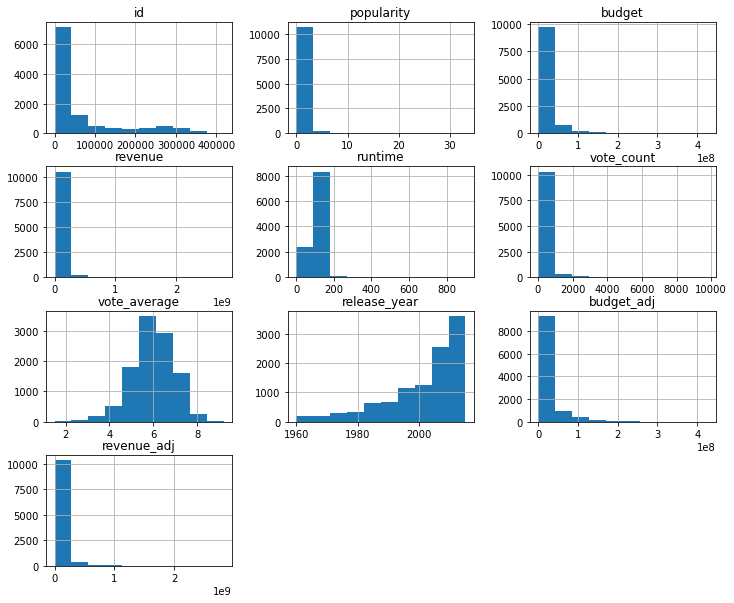

In [43]:
get_review(df_c)

# Missing Values

- Missing values will be filled with mean for Numeric columns like budget and revenue columns
- Missing values at unnessery columns for analysis like homepage will be deleted

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


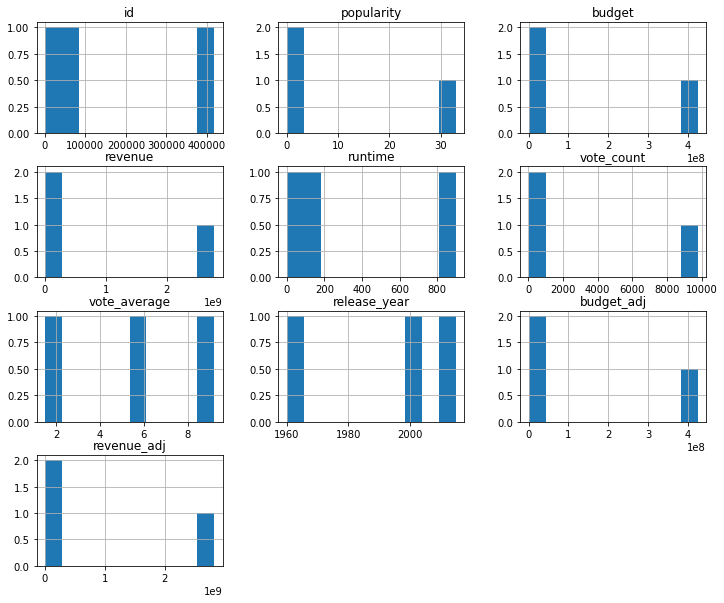

In [44]:
# # Quick check for numeric columns statistics
df_c.describe().loc[['min', 'mean', 'max']].hist(figsize = (12 , 10))
df_c.describe().loc[['min', 'mean', 'max']]

### OBESERVATIONS

#### Qulatiy:
- budget and revenue most are empty
- relaase date and release year columns change to to_datetime
- there some duplicated movies needs to be deleted
- clean columns from faulty and uncorrect data


#### Tidiness
- Remove unnecessery columns
- choose one column either relaese date or release year
- rearrange columns to be more easier to navigate

## Define 
- Drop columns cast, 'homepage', 'keywords', 'tagline', 'overview', budget and revenue
- Create first 2 actors column
- Create a new genres column
- Create a production company column
- Clean columns from faulty and uncorrect data and replace faulty data with empty string
- Delete unnessery duplicates and empty rows
- Change release date and year to_datetime
- Replace NaN's at budget_adj and revenue_adj with column mean.

- lower name columns content
- Save cleaning process

# Wrangle & Clean

In [45]:
#creat actors columns for every actor in the movie
df_c[['actor1', 'actor2', 'actor3', 'actor4', 'actor5']] = df_c.cast.apply(lambda x: pd.Series(str(x).split('|')))

In [46]:
#keep the first 2 actors and drop the rest
df_c.drop(['cast', 'actor3', 'actor4', 'actor5'], axis=1, inplace=True)

In [47]:
#create a new genres column contain only one keyword to make analysis easier
df_c.genres = df_c.genres.str.split('|', n=1, expand=True)

In [48]:
#create a production company column contains one keyword for better analysis
df_c.production_companies = df_c.production_companies.str.split('|', n=1, expand=True)

In [49]:
#create keyword column to help in identifing each movie 
df_c.keywords = df_c.keywords.str.split('|', n=1, expand=True)

In [50]:
#rearrange columns 
col_names = ['original_title', 'genres',  'actor1',
       'actor2', 'director',  'release_year', 'popularity',  'vote_average', 'vote_count', 
       'budget', 'revenue',  'tagline', 'keywords',  'production_companies', 'budget_adj', 'revenue_adj', 'overview', 'runtime', 'homepage',  'release_date', 'id', 'imdb_id',
            ]
df_c = df_c.reindex(columns=col_names)

In [51]:
#Drop unnessery columns
df_c.drop(['homepage', 'keywords', 'tagline', 'overview'], axis=1, inplace=True)

In [52]:
#Delete unnessery duplicates
df_c.drop_duplicates('original_title', keep='last', inplace=True)

In [53]:
#Delete empty data rows
df_c.dropna(subset=['genres','director', 'imdb_id'], inplace=True)

In [54]:
##Drop unnessery columns
df_c.drop(['budget', 'revenue'], axis=1, inplace=True)

In [55]:
#Rearrange columns
col_list = df_c.columns
col_list = ['original_title', 'genres', 'actor1', 'actor2', 'director',
       'popularity', 'release_date','vote_average',  'vote_count', 
       'production_companies', 'budget_adj', 'revenue_adj', 'release_year', 'runtime',
        'id', 'imdb_id']
df_c = df_c.reindex(columns=col_list)

In [56]:
#Replace zeros with NaN's
df_c['budget_adj'].replace(0,np.nan, inplace=True)

In [57]:
#Replace zeros with NaN's
df_c['revenue_adj'].replace(0,np.nan, inplace=True)

In [58]:
#Fill NaN's with column mean
df_c.budget_adj.fillna(df_c.budget_adj.mean(), inplace=True)

In [59]:
#Fill NaN's with column mean
df_c.revenue_adj.fillna(df_c.revenue_adj.mean(), inplace=True)

# TESTING

(10501, 16)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10501 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   original_title        10501 non-null  object 
 1   genres                10501 non-null  object 
 2   actor1                10501 non-null  object 
 3   actor2                10296 non-null  object 
 4   director              10501 non-null  object 
 5   popularity            10501 non-null  float64
 6   release_date          10501 non-null  object 
 7   vote_average          10501 non-null  float64
 8   vote_count            10501 non-null  int64  
 9   production_companies  9533 non-null   object 
 10  budget_adj            10501 non-null  float64
 11  revenue_adj           10501 non-null  float64
 12  release_year          10501 non-null  int64  
 13  runtime               10501 non-null  int64  
 14  id                    10501 non-null  int64  
 15  imdb_id            

None

,original_title,genres,actor1,actor2,director,popularity,release_date,vote_average,vote_count,production_companies,budget_adj,revenue_adj,release_year,runtime,id,imdb_id
2099,Cave of Forgotten Dreams,Documentary,Werner Herzog,Dominique Baffier,Werner Herzog,0.550709,9/10/10,7.1,32,creative differences,3.646539e+07,6.467348e+06,2010,90,59490,tt1664894
2644,Atlantis: The Lost Empire,Animation,Michael J. Fox,Corey Burton,Gary Trousdale|Kirk Wise,2.217239,6/2/01,6.5,689,Walt Disney Pictures,1.477786e+08,2.291230e+08,2001,95,10865,tt0230011
4345,Pumpkinhead II: Blood Wings,Horror,Andrew Robinson,Ami Dolenz,Jeff Burr,0.061916,3/16/94,5.1,17,Live Entertainment,3.646539e+07,1.138028e+08,1994,88,35977,tt0110913
7320,Cheech & Chong's Next Movie,Action,Cheech Marin,Tommy Chong,Tommy Chong,0.764524,7/18/80,6.3,23,Universal Pictures,3.646539e+07,1.102741e+08,1980,99,13612,tt0080520
5209,Tupac: Resurrection,Music,Tupac Shakur,NaN,Lauren Lazin,0.238250,1/23/03,8.0,15,Paramount Pictures,3.646539e+07,9.255855e+06,2003,112,21525,tt0343121
8592,Before and After,Drama,Meryl Streep,Liam Neeson,Barbet Schroeder,0.349723,2/23/96,5.8,17,Caravan Pictures,4.865759e+07,1.138028e+08,1996,108,43566,tt0115645
10297,National Lampoon's Loaded Weapon 1,Comedy,Emilio Estevez,Samuel L. Jackson,Gene Quintano,0.490013,2/4/93,5.5,72,New Line Cinema,1.207576e+01,4.075569e+01,1993,84,9644,tt0107659
3978,Dark Blue,Action,Kurt Russell,Scott Speedman,Ron Shelton,0.875700,12/14/02,6.7,33,United Artists,1.818392e+07,1.119823e+07,2002,118,4911,tt0279331
6946,Population 436,Drama,James Blicq,Cory Cassidy,Michelle MacLaren,0.043165,9/5/06,5.2,24,Pariah Entertainment Group,3.646539e+07,1.138028e+08,2006,88,1596,tt0462482
9165,Get Real,Drama,Ben Silverstone,Brad Gorton,Simon Shore,0.118303,8/16/98,6.8,23,NaN,3.646539e+07,1.138028e+08,1998,108,24584,tt0162973


,0
original_title,object
genres,object
actor1,object
actor2,object
director,object
popularity,float64
release_date,object
vote_average,float64
vote_count,int64
production_companies,object


,popularity,vote_average,vote_count,budget_adj,revenue_adj,release_year,runtime,id
count,10501.000000,10501.000000,10501.000000,1.050100e+04,1.050100e+04,10501.000000,10501.000000,10501.000000
mean,0.640266,5.974460,213.754309,3.646539e+07,1.138028e+08,2001.144843,101.999714,64987.011999
std,0.995289,0.932047,567.490865,2.863890e+07,1.306295e+08,12.893840,30.434083,91331.142973
min,0.000188,1.500000,10.000000,9.210911e-01,2.370705e+00,1960.000000,0.000000,5.000000
25%,0.208338,5.400000,17.000000,2.424523e+07,5.810025e+07,1994.000000,90.000000,10557.000000
50%,0.382872,6.000000,38.000000,3.646539e+07,1.138028e+08,2005.000000,99.000000,20235.000000
75%,0.707197,6.600000,143.000000,3.646539e+07,1.138028e+08,2011.000000,111.000000,73779.000000
max,32.985763,9.200000,9767.000000,4.250000e+08,2.827124e+09,2015.000000,900.000000,417859.000000


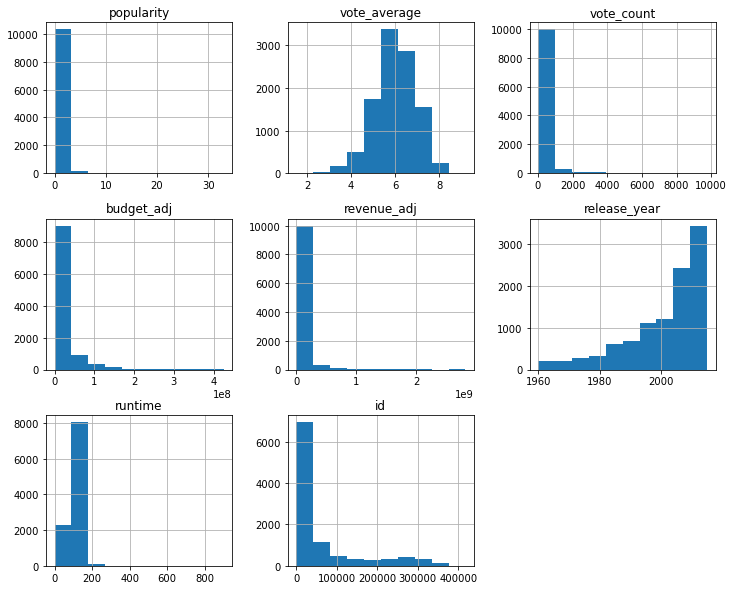

In [60]:
# Call function to check the data after cleaning
get_review(df_c)

In [61]:
# Check geners count
df_c.groupby('genres')['id'].count()

genres
Action             1539
Adventure           561
Animation           394
Comedy             2283
Crime               367
Documentary         418
Drama              2382
Family              140
Fantasy             258
Foreign               8
History              42
Horror              873
Music                93
Mystery             122
Romance             179
Science Fiction     205
TV Movie             71
Thriller            468
War                  58
Western              40
Name: id, dtype: int64

# VISUALISATION

## Uni-Variante

,vote_average
count,10501.000000
mean,5.974460
std,0.932047
min,1.500000
25%,5.400000
50%,6.000000
75%,6.600000
max,9.200000


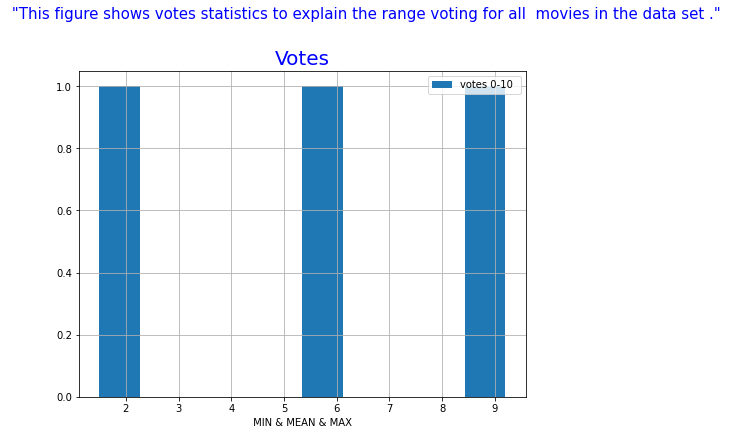

In [62]:
df_c.vote_average.describe().loc[['mean', 'max' , 'min' ]].hist(figsize = (8,6));
plt.xlabel(' MIN & MEAN & MAX ')
plt.legend( ['votes 0-10 '])
plt.title('Votes', fontsize = 20, color = 'b');
plt.figtext(0,1, ' "This figure shows votes statistics to explain the range voting for all  movies in the data set ." ', fontsize = 15, color = 'blue');
plt.savefig('Votes_stat.jpg');
pd.DataFrame(df_c.vote_average.describe() )

,revenue_adj
count,1.050100e+04
mean,1.138028e+08
std,1.306295e+08
min,2.370705e+00
25%,5.810025e+07
50%,1.138028e+08
75%,1.138028e+08
max,2.827124e+09


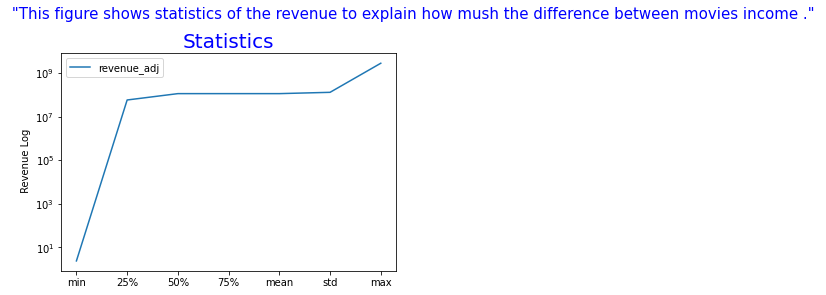

In [63]:
pd.DataFrame(df_c['revenue_adj'].describe().loc[['min','25%' ,'50%', '75%', 'mean', 'std', 'max']]).plot()
plt.title('Statistics', fontsize = 20, color = 'b');
plt.yscale('log')
plt.ylabel(' Revenue Log')
plt.figtext(0,1, ' "This figure shows statistics of the revenue to explain how mush the difference between movies income ." ', fontsize = 15, color = 'blue');
plt.savefig('Statistics_revs.jpg');
pd.DataFrame(df_c['revenue_adj'].describe())

In [64]:
#Create a column of top reveanue columns
top_rev = df_c.sort_values('revenue_adj',ascending=False).head(5)

## Multi-Variante

,revenue_adj
original_title,
Avatar,2.827124e+09
Jaws,1.907006e+09
Star Wars,2.789712e+09
Star Wars: The Force Awakens,1.902723e+09
The Exorcist,2.167325e+09


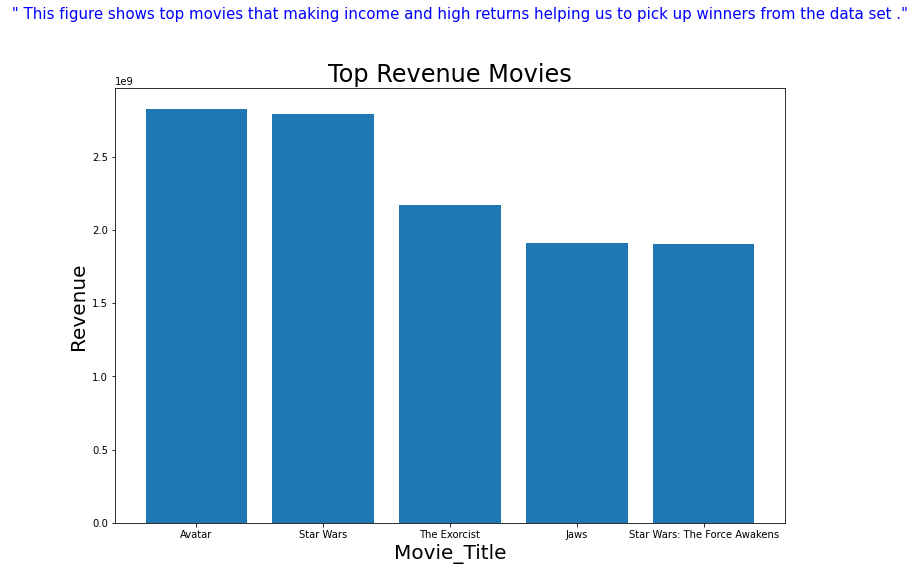

In [65]:
#Visulazie top reveanue movies

plt.figure(figsize=(12,8))
plt.bar(top_rev.original_title,top_rev.revenue_adj);
plt.xlabel('Movie_Title', fontsize = 20);
plt.ylabel('Revenue', fontsize = 20);
plt.title('Top Revenue Movies', fontsize = 24);
plt.figtext( 0 ,1 , ' " This figure shows top movies that making income and high returns helping us to pick up winners from the data set ." ', fontsize = 15, color = 'b', rotation = 'horizontal');
plt.savefig('top_movs.jpg');
pd.DataFrame(top_rev.groupby('original_title')['revenue_adj'].mean())

,revenue_adj
actor1,
Harrison Ford,1.902723e+09
Linda Blair,2.167325e+09
Mark Hamill,2.789712e+09
Roy Scheider,1.907006e+09
Sam Worthington,2.827124e+09


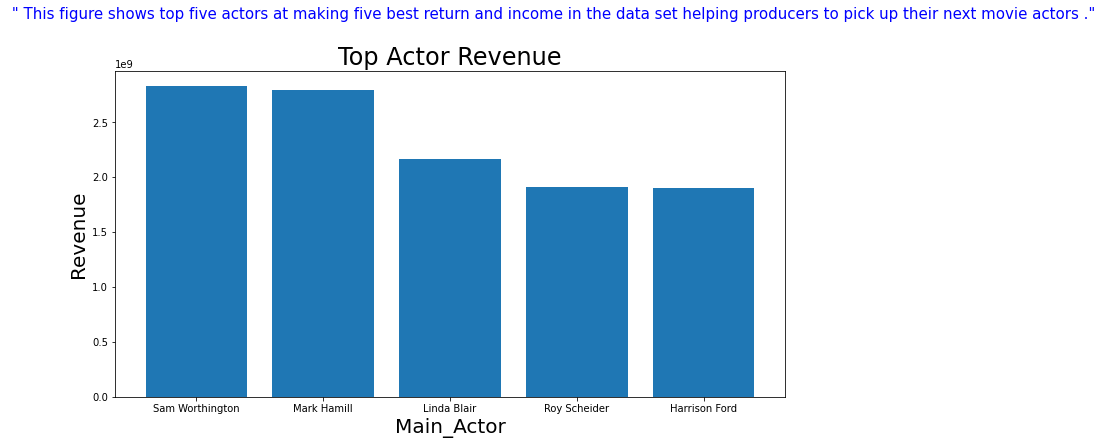

In [66]:
#Visualize top reveanue actors
plt.figure(figsize=(12,6))
plt.bar(top_rev.actor1, top_rev.revenue_adj);
plt.xlabel('Main_Actor', fontsize = 20);
plt.ylabel('Revenue', fontsize = 20);
plt.title('Top Actor Revenue', fontsize = 24);
plt.figtext( 0,1, ' " This figure shows top five actors at making five best return and income in the data set helping producers to pick up their next movie actors ." ', fontsize = 15, color = 'b', rotation = 'horizontal');
plt.savefig('actor_revs.jpg');
pd.DataFrame(top_rev.groupby('actor1')['revenue_adj'].mean())

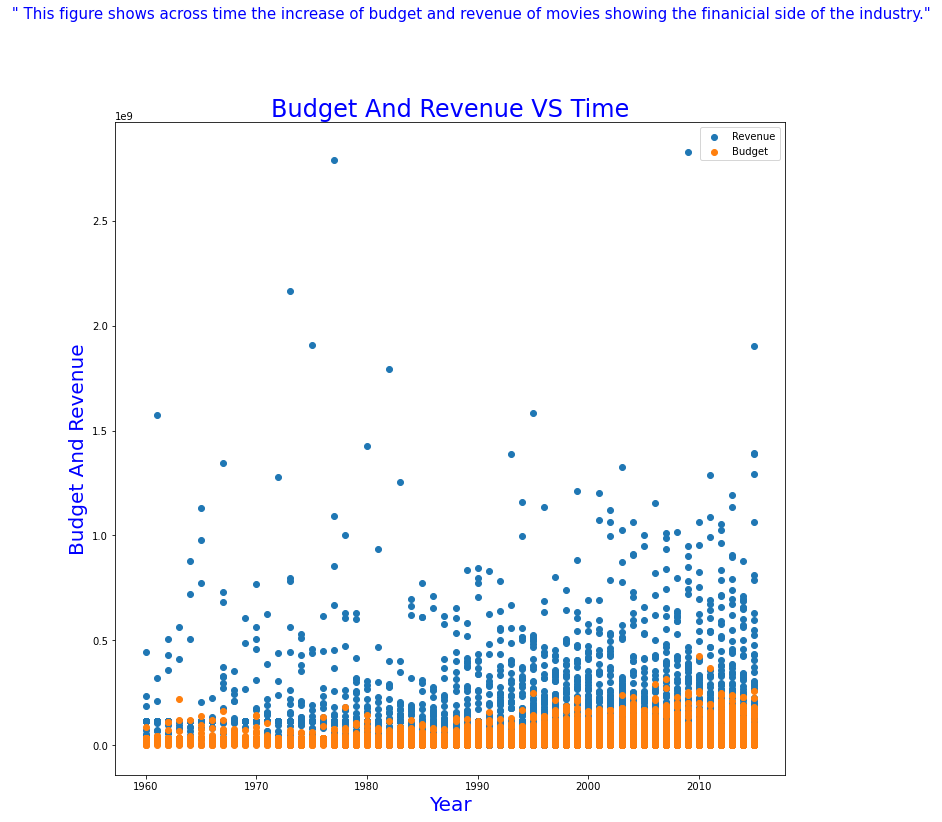

In [67]:
#Reveanue over years VS budget over years
plt.figure(figsize=(12,12))
plt.scatter(df_c.release_year, df_c.revenue_adj);
plt.scatter(df_c.release_year, df_c.budget_adj);
plt.xlabel('Year', fontsize = 20, color = 'b');
plt.ylabel('Budget And Revenue', fontsize = 20, color = 'b');
plt.title('Budget And Revenue VS Time', fontsize = 24, color = 'b');
plt.legend(["Revenue", "Budget"])
plt.figtext( 0 ,1 , ' " This figure shows across time the increase of budget and revenue of movies showing the finanicial side of the industry." ', fontsize = 15, color = 'b', rotation = 'horizontal');
plt.savefig('time_revs.jpg');


In [68]:
df_c.nlargest(5, 'popularity' )

,original_title,genres,actor1,actor2,director,popularity,release_date,vote_average,vote_count,production_companies,budget_adj,revenue_adj,release_year,runtime,id,imdb_id
0,Jurassic World,Action,Chris Pratt,Bryce Dallas Howard,Colin Trevorrow,32.985763,6/9/15,6.5,5562,Universal Studios,1.379999e+08,1.392446e+09,2015,124,135397,tt0369610
1,Mad Max: Fury Road,Action,Tom Hardy,Charlize Theron,George Miller,28.419936,5/13/15,7.1,6185,Village Roadshow Pictures,1.379999e+08,3.481613e+08,2015,120,76341,tt1392190
629,Interstellar,Adventure,Matthew McConaughey,Jessica Chastain,Christopher Nolan,24.949134,11/5/14,8.0,6498,Paramount Pictures,1.519800e+08,5.726906e+08,2014,169,157336,tt0816692
630,Guardians of the Galaxy,Action,Chris Pratt,Zoe Saldana,James Gunn,14.311205,7/30/14,7.9,5612,Marvel Studios,1.565855e+08,7.122911e+08,2014,121,118340,tt2015381
2,Insurgent,Adventure,Shailene Woodley,Theo James,Robert Schwentke,13.112507,3/18/15,6.3,2480,Summit Entertainment,1.012000e+08,2.716190e+08,2015,119,262500,tt2908446


In [69]:
df_c.nsmallest(5, 'popularity')

,original_title,genres,actor1,actor2,director,popularity,release_date,vote_average,vote_count,production_companies,budget_adj,revenue_adj,release_year,runtime,id,imdb_id
9977,The Hospital,Mystery,George C. Scott,Diana Rigg,Arthur Hiller,0.000188,12/14/71,6.4,10,Simcha Productions,3.646539e+07,1.138028e+08,1971,103,32082,tt0067217
6080,G.B.F.,Comedy,Michael J. Willett,Paul Iacono,Darren Stein,0.000620,10/20/13,6.1,82,School Pictures,3.646539e+07,1.138028e+08,2013,92,174323,tt2429074
6551,Mon petit doigt m'a dit...,Comedy,Catherine Frot,AndrÃ© Dussollier,Pascal Thomas,0.000973,4/13/05,5.7,13,RhÃ´ne-Alpes CinÃ©ma,3.646539e+07,1.138028e+08,2005,105,31329,tt0445570
6961,Khosla Ka Ghosla!,Comedy,Anupam Kher,Boman Irani,Dibakar Banerjee,0.001115,9/22/06,6.8,10,UTV Motion Pictures,3.646539e+07,1.138028e+08,2006,135,15412,tt0466460
7268,Born into Brothels,Documentary,Zana Briski,Avijit,Zana Briski|Ross Kauffman,0.001117,12/8/04,6.4,23,NaN,4.040559e+05,4.057946e+06,2004,85,1392,tt0388789


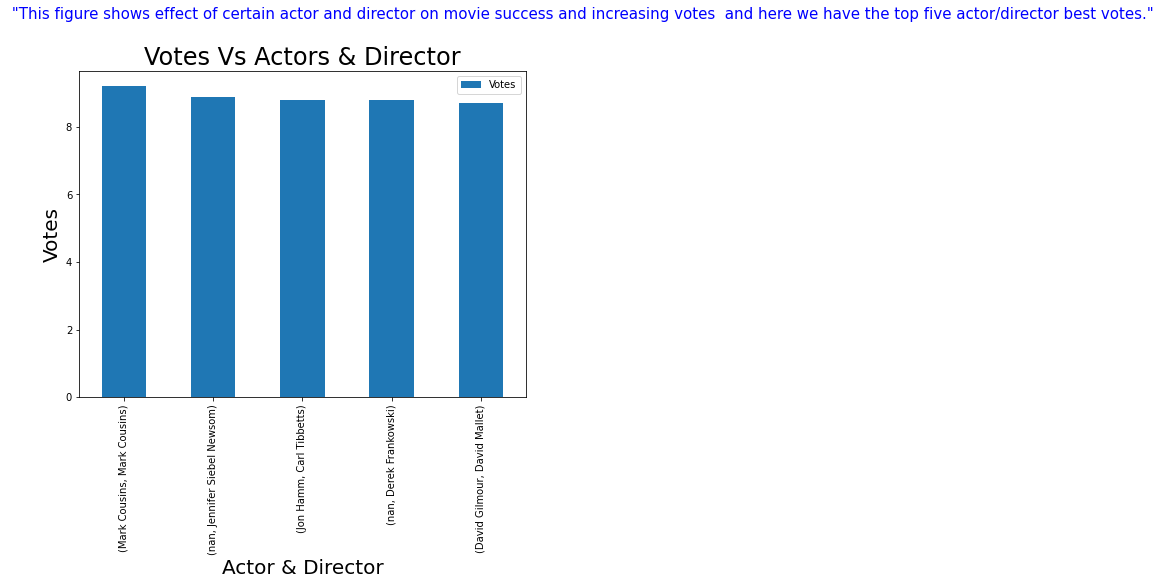

In [70]:
#Relation between first stars of every movie and voting
plt.figure(figsize=(8, 6))
df_c.groupby(['actor1', 'director'])['vote_average'].mean().sort_values(ascending = False).nlargest(5).plot(kind='bar');
plt.xlabel('Actor & Director', fontsize = 20);
plt.ylabel('Votes', fontsize = 20);
plt.title('Votes Vs Actors & Director', fontsize = 24);
plt.legend(["Votes"])
plt.figtext( 0 ,1 , ' "This figure shows effect of certain actor and director on movie success and increasing votes  and here we have the top five actor/director best votes." ', fontsize = 15, color = 'b', rotation = 'horizontal');
plt.savefig('votes_act&dic.jpg');

<ipython-input-71-0ae47709efda>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_c.groupby('genres')['budget_adj','revenue_adj'].mean().nlargest(5,'revenue_adj').sort_values('revenue_adj', ascending=False).plot(kind='bar');
<ipython-input-71-0ae47709efda>:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_c.groupby('genres')['budget_adj','revenue_adj'].mean().nlargest(5,'revenue_adj')


,budget_adj,revenue_adj
genres,,
Adventure,6.183049e+07,2.116784e+08
Animation,4.618151e+07,1.565686e+08
Science Fiction,4.454589e+07,1.517403e+08
Family,4.343352e+07,1.469157e+08
Fantasy,4.500833e+07,1.382331e+08


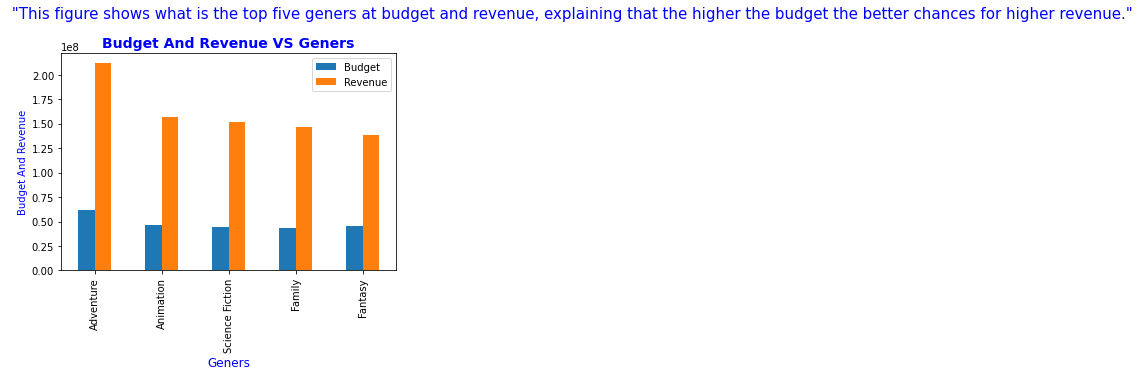

In [71]:
#Relation between buget and revenue for top movie genres
df_c.groupby('genres')['budget_adj','revenue_adj'].mean().nlargest(5,'revenue_adj').sort_values('revenue_adj', ascending=False).plot(kind='bar');
plt.xlabel('Geners', fontsize = 12, color = 'b');
plt.ylabel('Budget And Revenue', fontsize = 10, color = 'b');
plt.title('Budget And Revenue VS Geners', fontsize = 14, color = 'b', fontweight = "bold" );
plt.legend([ "Budget", "Revenue"]);
plt.figtext(0,1, ' "This figure shows what is the top five geners at budget and revenue, explaining that the higher the budget the better chances for higher revenue." ', fontsize = 15, color = 'b', rotation = 'horizontal');
plt.savefig('geners_revs.jpg');
df_c.groupby('genres')['budget_adj','revenue_adj'].mean().nlargest(5,'revenue_adj')


,revenue_adj
actor1,
Mark Hamill,1.395490e+09
Chris Pratt,1.052369e+09
Rod Taylor,8.443088e+08
Phil Harris,8.291219e+08
Omar Sharif,7.731786e+08


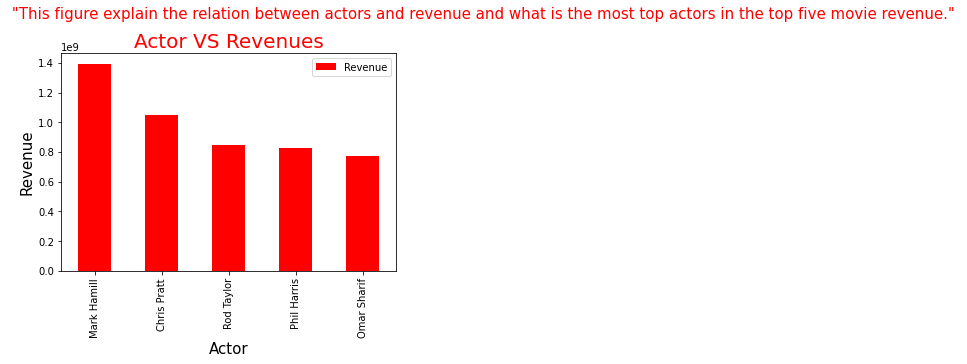

In [72]:
#Relation between first actor and revenue
df_c.groupby('actor1')['revenue_adj'].mean().nlargest(5).plot.bar('actor1', 'revenue_adj', color='red');
plt.xlabel('Actor', fontsize = 15);
plt.ylabel('Revenue', fontsize = 15);
plt.title('Actor VS Revenues', fontsize = 20, color = 'r');
plt.legend(["Revenue"]);
plt.figtext(0,1, ' "This figure explain the relation between actors and revenue and what is the most top actors in the top five movie revenue." ', fontsize = 15, color = 'r');
plt.savefig('act_revs.jpg');
pd.DataFrame(df_c.groupby('actor1')['revenue_adj'].mean().nlargest(5))

,popularity
actor1,
Chris Pratt,23.648484
Scott Adsit,8.691294
Trevor Devall,8.411577
Domhnall Gleeson,6.118847
Shailene Woodley,5.716781


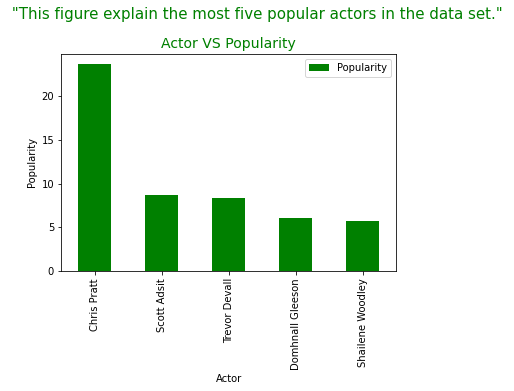

In [73]:
#relation between first actor and movie popularity
df_c.groupby('actor1')['popularity'].mean().nlargest(5).plot.bar('actor1', 'revenue_adj', color='green');
plt.xlabel('Actor', fontsize = 10);
plt.ylabel('Popularity', fontsize = 10);
plt.title('Actor VS Popularity', fontsize = 14, color = 'g');
plt.legend([  "Popularity"]);
plt.figtext(0,1, ' "This figure explain the most five popular actors in the data set." ', fontsize = 15, color = 'green');
plt.savefig('act_Pops.jpg');
pd.DataFrame(df_c.groupby('actor1')['popularity'].mean().nlargest(5))

In [74]:
df_c.head()

,original_title,genres,actor1,actor2,director,popularity,release_date,vote_average,vote_count,production_companies,budget_adj,revenue_adj,release_year,runtime,id,imdb_id
0,Jurassic World,Action,Chris Pratt,Bryce Dallas Howard,Colin Trevorrow,32.985763,6/9/15,6.5,5562,Universal Studios,1.379999e+08,1.392446e+09,2015,124,135397,tt0369610
1,Mad Max: Fury Road,Action,Tom Hardy,Charlize Theron,George Miller,28.419936,5/13/15,7.1,6185,Village Roadshow Pictures,1.379999e+08,3.481613e+08,2015,120,76341,tt1392190
2,Insurgent,Adventure,Shailene Woodley,Theo James,Robert Schwentke,13.112507,3/18/15,6.3,2480,Summit Entertainment,1.012000e+08,2.716190e+08,2015,119,262500,tt2908446
3,Star Wars: The Force Awakens,Action,Harrison Ford,Mark Hamill,J.J. Abrams,11.173104,12/15/15,7.5,5292,Lucasfilm,1.839999e+08,1.902723e+09,2015,136,140607,tt2488496
4,Furious 7,Action,Vin Diesel,Paul Walker,James Wan,9.335014,4/1/15,7.3,2947,Universal Pictures,1.747999e+08,1.385749e+09,2015,137,168259,tt2820852


,vote_average
count,10501.000000
mean,5.974460
std,0.932047
min,1.500000
25%,5.400000
50%,6.000000
75%,6.600000
max,9.200000


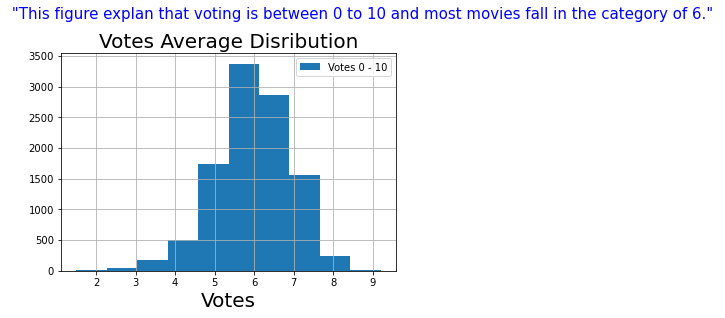

In [75]:
#Most of the movies get an average vote of 6
df_c.vote_average.hist();
plt.xlabel('Votes', fontsize = 20);
plt.title('Votes Average Disribution', fontsize = 20);
plt.legend(["Votes 0 - 10"]);
plt.figtext(0,1, ' "This figure explan that voting is between 0 to 10 and most movies fall in the category of 6." ', fontsize = 15, color = 'blue');
plt.savefig('votes.jpg');
pd.DataFrame(df_c.vote_average.describe())

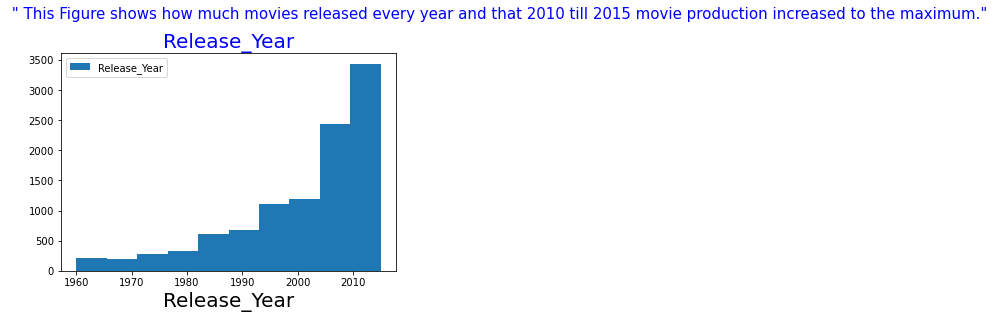

In [76]:
#Most of the movies produced at which years
plt.hist(df_c.release_year)
plt.xlabel('Release_Year', fontsize = 20);
plt.title('Release_Year', fontsize = 20, color ='b');
plt.legend(["Release_Year"]);
plt.figtext(0,1, ' " This Figure shows how much movies released every year and that 2010 till 2015 movie production increased to the maximum." ', fontsize = 15, color = 'blue');
plt.savefig('release_year.jpg');
#pd.DataFrame(df_c.release_year.agg(['min', 'mean', 'max'])).astype(int)

## Description of  the main results and insights obtained during the investigation

- Top revnue movie is Avatar
- Adventure movies get the highest revenue
- The bigger the budget the higher the the revenue
- Chris Pratt is very popular actor his movies got very high revenue
- Mark Hamill his movies created the biggest revenue
- Mark Cousins as a director and actor his movies got the top votes.
- The budget and revenue increase dramatically through years
- Sam worthington got the top revenue between other actors
- Science fiction movies like Star_wars and Avatar takes a big budget with very high returns 
- science fiction actors are very popular


## Insights
- The bigger the budget the higher the revenue
- Science fiction and adventures movies got the highest revenue
- Science ficton and adventure actors  are very popluar 

## DISCUSSION OF CONCLUSIONS
- A successful movie needs a lot variable as budget and revenue are the main factor of movie success finicially, poplularity and even create huge success for production company, actors and directors so to make a successful movie there is a big chance to success if it is an adventure science fiction movie with popluar actors and directors, high budget we expect a high returns.

## LIMITATIONS

- The data set wasn't 100% percent enough cause maybe there are some factors mentioned below, if I had those columns for gender, writers, and actor     salary it can create more diverse output.
- We need a column of actor gender to find out is there any effect of gender on revenue and which gender more popular
- We need a column of writers to add to our analysis to get a better view of how a great writer could affect movie success
- There was missing data at budget_adj and revenue_adj columns.
- If there is a column for how much the actor paid will also filter actors based on the cost to the relation between actor cost and movie success.

In [77]:
#Save a clean copy from the data set
df_c.to_csv( 'tmdb-movies-final-clean.csv', index = False)